In [61]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [62]:
#import the data
HG = yf.Ticker("HG=F")

In [63]:
data = yf.download("HG=F", start="2017-01-01", end="2022-07-28")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [64]:
data.head()

Date
2017-01-03    2.4810
2017-01-04    2.5480
2017-01-05    2.5295
2017-01-06    2.5380
2017-01-09    2.5300
Name: Adj Close, dtype: float64

In [65]:
data.tail()

Date
2022-07-21    3.3020
2022-07-22    3.3485
2022-07-25    3.3510
2022-07-26    3.3825
2022-07-27    3.4295
Name: Adj Close, dtype: float64

In [66]:
log_returns = np.log(1 + data.pct_change())

In [67]:
log_returns.tail()

Date
2022-07-21   -0.008294
2022-07-22    0.013984
2022-07-25    0.000746
2022-07-26    0.009356
2022-07-27    0.013799
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price USD')

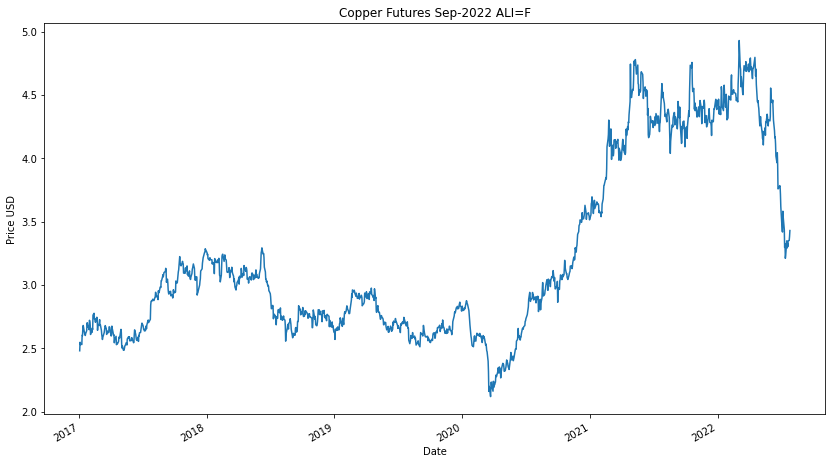

In [68]:
data.plot(figsize=(14,8))
plt.title('Copper Futures Sep-2022 ALI=F')
plt.ylabel('Price USD')

In [69]:
u = log_returns.mean()
u

0.00023108695560748475

In [70]:
var = log_returns.var()
var

0.00019337685602740758

In [71]:
stdev = log_returns.std()
stdev

0.013906000720099492

In [72]:
drift = u - (0.5 * var)
drift

0.00013439852759378096

In [73]:
np.array(drift)

array(0.0001344)

In [74]:
np.array(stdev)

array(0.013906)

In [75]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [76]:
x = np.random.rand(10,2)
x

array([[0.19910887, 0.72532173],
       [0.81101322, 0.78460563],
       [0.91260643, 0.43762252],
       [0.54734539, 0.29548693],
       [0.31502583, 0.0453679 ],
       [0.80196719, 0.22785189],
       [0.53905111, 0.90555761],
       [0.10576604, 0.24012774],
       [0.59882582, 0.4137078 ],
       [0.38335695, 0.19771222]])

In [77]:
norm.ppf(x)

array([[-0.84480856,  0.59872462],
       [ 0.88163623,  0.78784267],
       [ 1.35698133, -0.15699976],
       [ 0.11895725, -0.53742532],
       [-0.48165414, -1.69152909],
       [ 0.8486688 , -0.74593979],
       [ 0.09804347,  1.31388539],
       [-1.24936367, -0.70589173],
       [ 0.25030905, -0.21801735],
       [-0.29667598, -0.84982131]])

In [78]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.2907903 ,  1.09639916],
       [ 0.95356552,  1.87861575],
       [-0.4765023 ,  0.39644042],
       [-0.36619268, -0.08081463],
       [ 1.14333264,  1.25029232],
       [-0.74689169,  0.47818873],
       [ 0.54528026,  1.00225014],
       [ 0.56510952, -0.33996392],
       [ 0.46307466, -0.29432016],
       [ 0.02628594,  0.13231645]])

In [79]:
t_intervals = 120
interations = 500

In [80]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[0.98447448, 0.98849468, 0.99144896, ..., 1.00525108, 1.00262755,
        1.02747902],
       [1.00024076, 1.01053488, 0.97901419, ..., 0.98851954, 1.00445778,
        0.98986306],
       [0.97418343, 0.98770377, 1.0294712 , ..., 1.01578547, 0.98828527,
        0.9872337 ],
       ...,
       [0.99240409, 1.0010128 , 1.0021096 , ..., 0.99734163, 1.01000938,
        1.02989673],
       [1.00389746, 0.98956494, 1.00408949, ..., 1.03129918, 0.9807919 ,
        0.99097106],
       [1.0004462 , 1.00261582, 1.01581922, ..., 0.97745095, 1.02511198,
        0.99921161]])

In [81]:
s_zero = data.iloc[-1]
s_zero

3.429500102996826

In [82]:
price_list = np.zeros_like(daily_returns)

In [83]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
price_list[0] = s_zero
price_list

array([[3.4295001, 3.4295001, 3.4295001, ..., 3.4295001, 3.4295001,
        3.4295001],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [85]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [86]:
price_list

array([[3.4295001 , 3.4295001 , 3.4295001 , ..., 3.4295001 , 3.4295001 ,
        3.4295001 ],
       [3.43032579, 3.46562946, 3.35752926, ..., 3.39012787, 3.44478806,
        3.39473548],
       [3.34176654, 3.42301529, 3.45647968, ..., 3.44364263, 3.4044333 ,
        3.35139729],
       ...,
       [2.90941963, 2.76446478, 3.14518086, ..., 3.33500534, 3.35336437,
        3.44257251],
       [2.92075899, 2.73561743, 3.15804304, ..., 3.43938829, 3.28895262,
        3.41148975],
       [2.92206222, 2.74277332, 3.20800082, ..., 3.36183337, 3.37154475,
        3.40880016]])

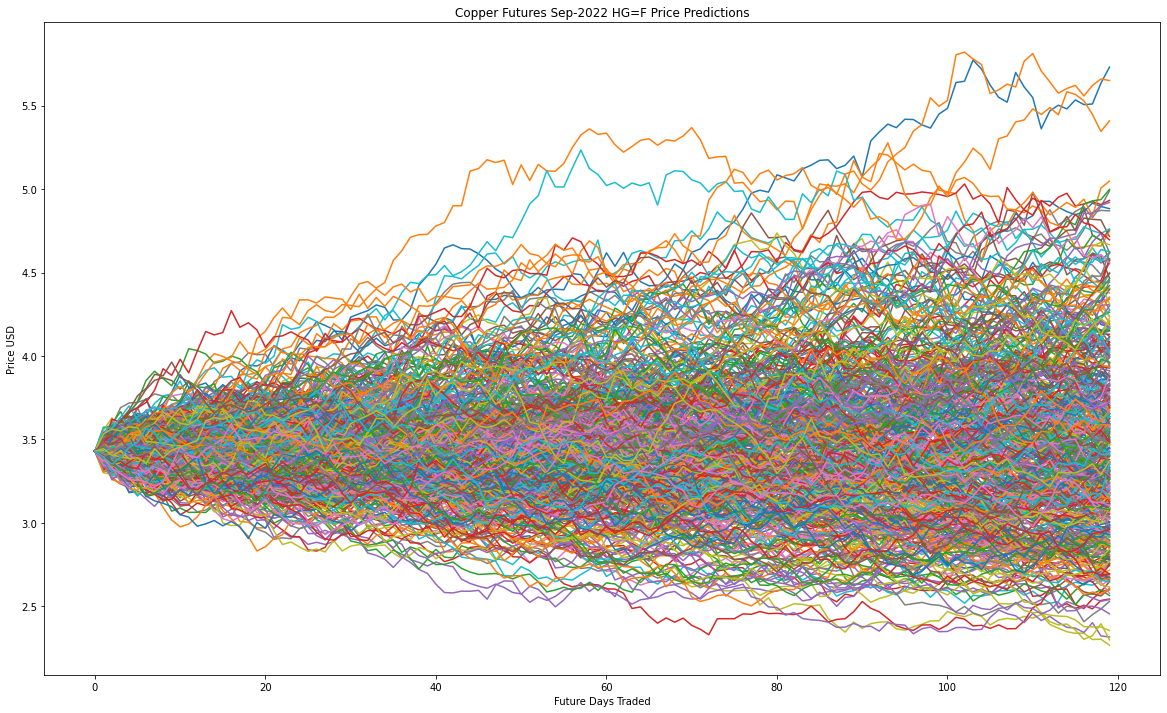

In [87]:
plt.figure(figsize=(20,12))
plt.title('Copper Futures Sep-2022 HG=F Price Predictions')
plt.xlabel('Future Days Traded')
plt.ylabel('Price USD')
plt.plot(price_list)